# **Task 1: Exploratory Data Analysis (EDA):**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.pipeline import Pipeline

In [3]:
# plotting defaults
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,5)

In [5]:
# Load dataset (change path)
df = pd.read_csv('/content/wine.csv')

In [6]:
# Quick peek
print(df.shape)
display(df.head())
display(df.info())
display(df.describe().T)

(178, 14)


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


None

,count,mean,std,min,25%,50%,75%,max
Type,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoids,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


**EDA suggestions (code)**

In [7]:
# 1. check missing values
print("Missing values per column:\n", df.isna().sum())

Missing values per column:
 Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64


In [8]:
# 2. numeric-only dataframe for PCA/clustering (drop non-numeric)
num = df.select_dtypes(include=[np.number]).copy()
print("Numeric columns used:", num.columns.tolist())

Numeric columns used: ['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols', 'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue', 'Dilution', 'Proline']


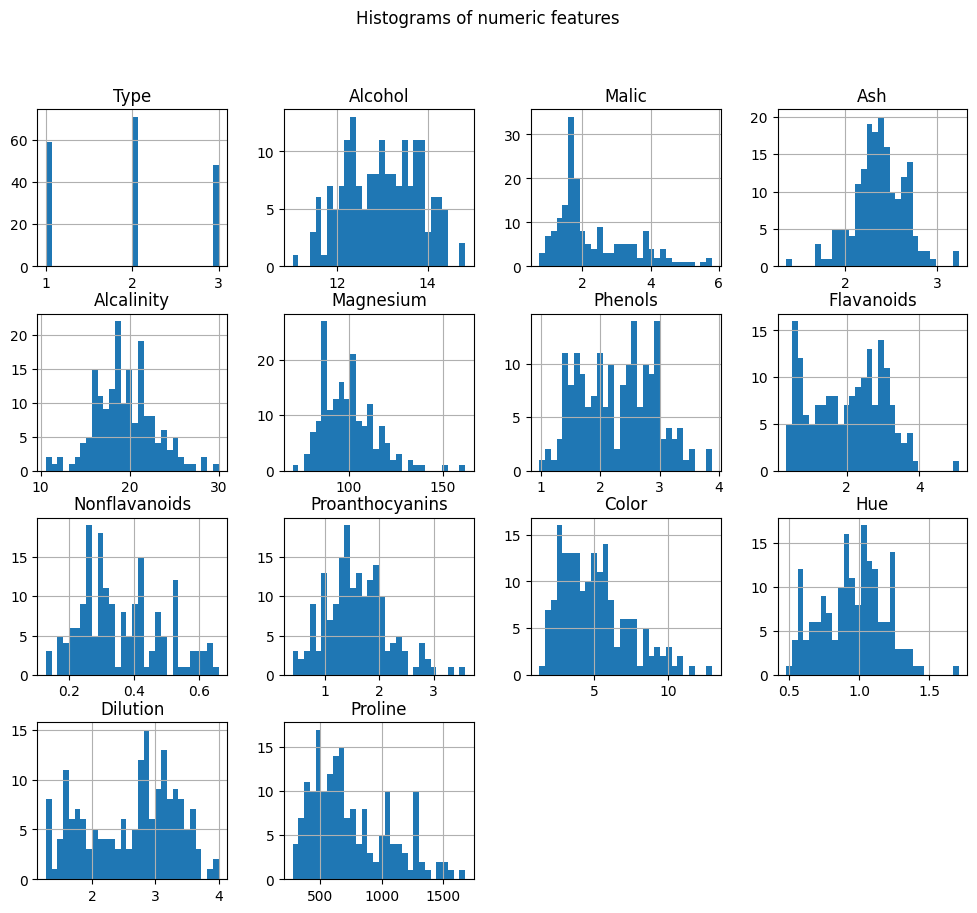

In [9]:
# 3. histograms & density
num.hist(bins=30, figsize=(12,10))
plt.suptitle('Histograms of numeric features')
plt.show()

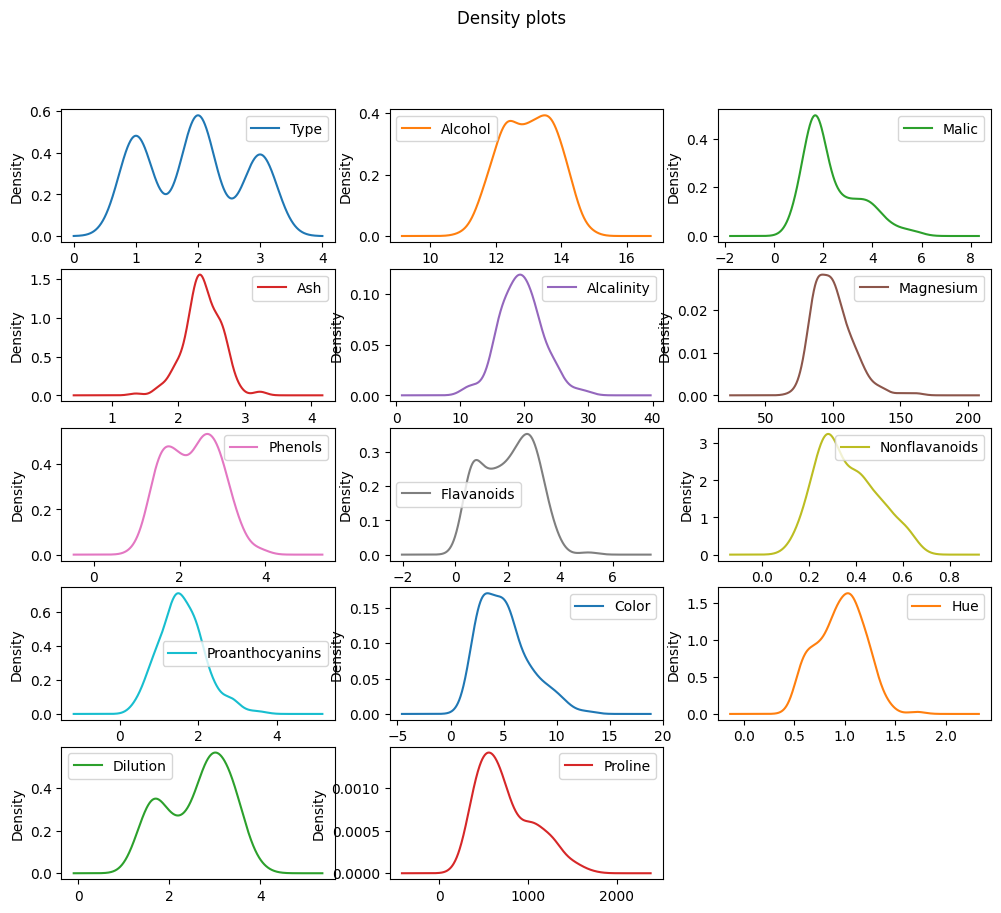

In [10]:
# density plots (optional)
num.plot(kind='density', subplots=True, layout=(int(np.ceil(len(num.columns)/3)),3), sharex=False, figsize=(12,10))
plt.suptitle('Density plots')
plt.show()

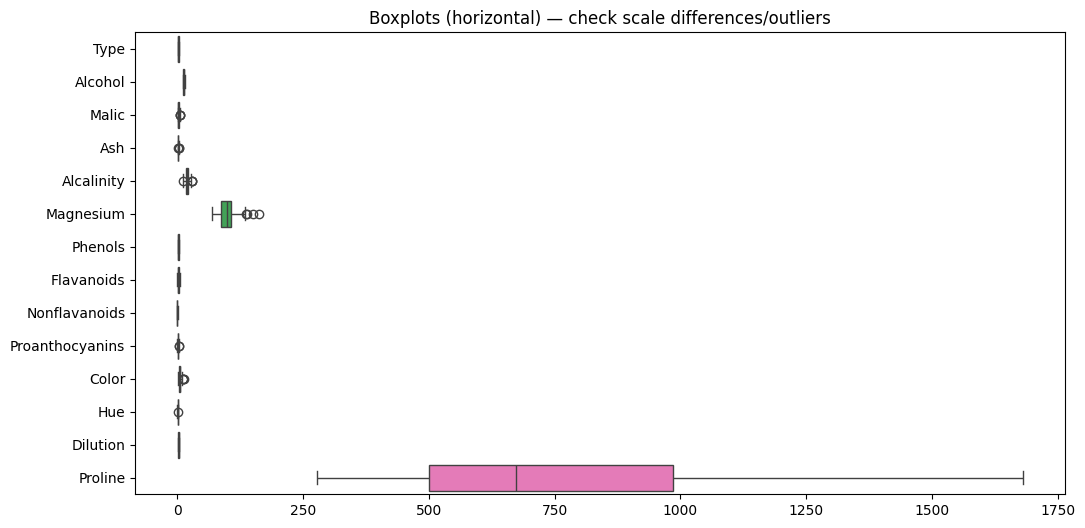

In [11]:
# 4. boxplots to spot outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=num, orient='h')
plt.title('Boxplots (horizontal) — check scale differences/outliers')
plt.show()

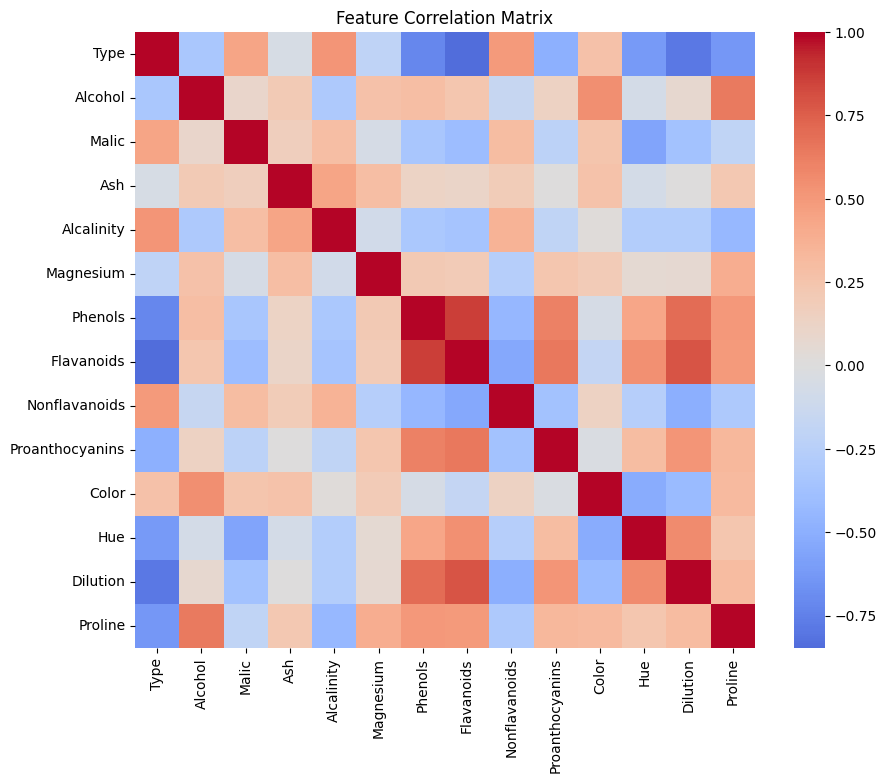

In [12]:
# 5. correlation heatmap
corr = num.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

In [13]:
# 6. strong correlations list
pairs = corr.abs().unstack().sort_values(kind="quicksort", ascending=False)
pairs = pairs[pairs < 1].drop_duplicates()
print("Top correlated pairs:\n", pairs.head(10))

Top correlated pairs:
 Phenols          Flavanoids    0.864564
Flavanoids       Type          0.847498
Type             Dilution      0.788230
Dilution         Flavanoids    0.787194
Phenols          Type          0.719163
                 Dilution      0.699949
Proanthocyanins  Flavanoids    0.652692
Alcohol          Proline       0.643720
Proline          Type          0.633717
Type             Hue           0.617369
dtype: float64


# **2) Standardize & PCA (determine optimal components)**

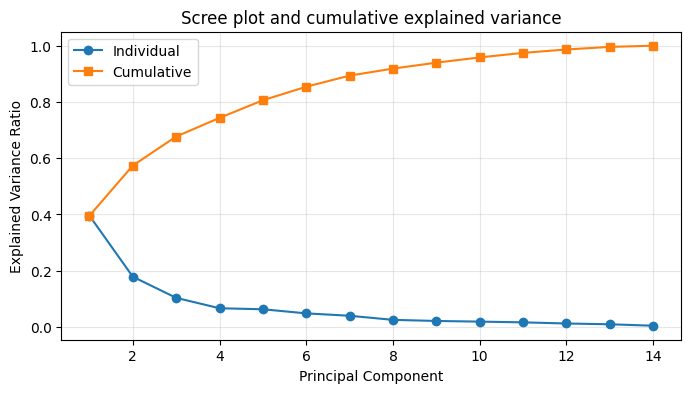

,PC,ExplainedVar,CumulativeVar
0,1,0.395425,0.395425
1,2,0.178363,0.573787
2,3,0.103291,0.677078
3,4,0.066280,0.743358
4,5,0.062679,0.806037
5,6,0.048056,0.854093
6,7,0.039557,0.893650
7,8,0.025002,0.918652
8,9,0.021039,0.939691
9,10,0.018736,0.958427


In [14]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num)

# PCA to inspect explained variance
pca_full = PCA()
pca_full.fit(X_scaled)

explained = pca_full.explained_variance_ratio_
cum_explained = np.cumsum(explained)

# Scree plot
plt.figure(figsize=(8,4))
plt.plot(range(1, len(explained)+1), explained, marker='o', label='Individual')
plt.plot(range(1, len(explained)+1), cum_explained, marker='s', label='Cumulative')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree plot and cumulative explained variance')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Print cumulative variance table
ev = pd.DataFrame({
    'PC': range(1, len(explained)+1),
    'ExplainedVar': explained,
    'CumulativeVar': cum_explained
})
display(ev.head(15))


In [15]:
target_variance = 0.90
k = np.searchsorted(cum_explained, target_variance) + 1
print(f"Components to retain {target_variance*100:.0f}% variance: k = {k}")


Components to retain 90% variance: k = 8


**Transform:**

In [16]:
# Use chosen k (replace with k from above or fixed like 2/3/5)
k = k  # or k = 3
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X_scaled)

print("Shape original:", X_scaled.shape, "-> PCA shape:", X_pca.shape)


Shape original: (178, 14) -> PCA shape: (178, 8)


# **3) Clustering on original (standardized) data**

**Finding sensible K (elbow + silhouette)**

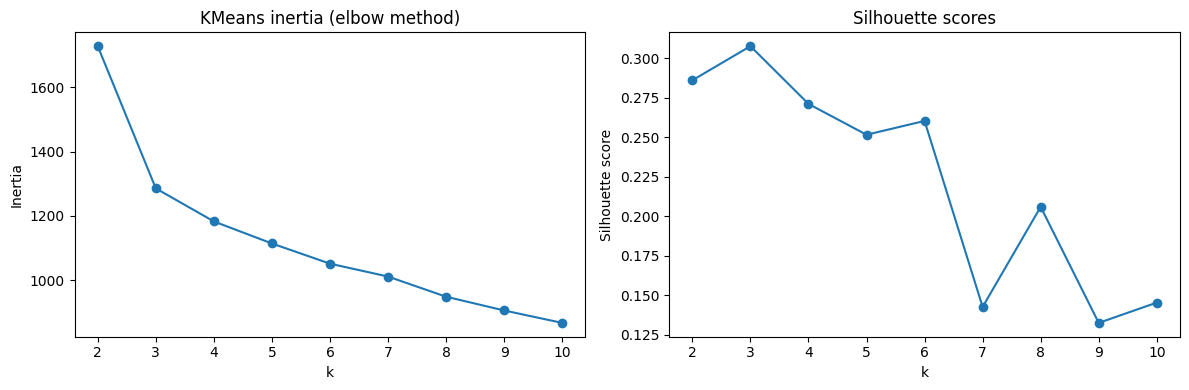

In [17]:
from sklearn.metrics import silhouette_score

def evaluate_kmeans(X, k_range=(2,11)):
    inertias = []
    silhouettes = []
    for k in range(k_range[0], k_range[1]):
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = km.fit_predict(X)
        inertias.append(km.inertia_)
        silhouettes.append(silhouette_score(X, labels))
    return inertias, silhouettes

inertias, silhouettes = evaluate_kmeans(X_scaled, (2,11))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(2,11), inertias, marker='o')
plt.title('KMeans inertia (elbow method)')
plt.xlabel('k')
plt.ylabel('Inertia')

plt.subplot(1,2,2)
plt.plot(range(2,11), silhouettes, marker='o')
plt.title('Silhouette scores')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.tight_layout()
plt.show()


**Choose k based on elbow + high silhouette. Then train:**

In [18]:
k_chosen = 3  # replace with chosen value
km_orig = KMeans(n_clusters=k_chosen, random_state=42, n_init=20)
labels_orig = km_orig.fit_predict(X_scaled)

print("Silhouette (orig):", silhouette_score(X_scaled, labels_orig))
print("Davies-Bouldin (orig):", davies_bouldin_score(X_scaled, labels_orig))


Silhouette (orig): 0.30773604383565206
Davies-Bouldin (orig): 1.3163957434114109


**Visualize clusters (use PCA 2 components for plotting)**

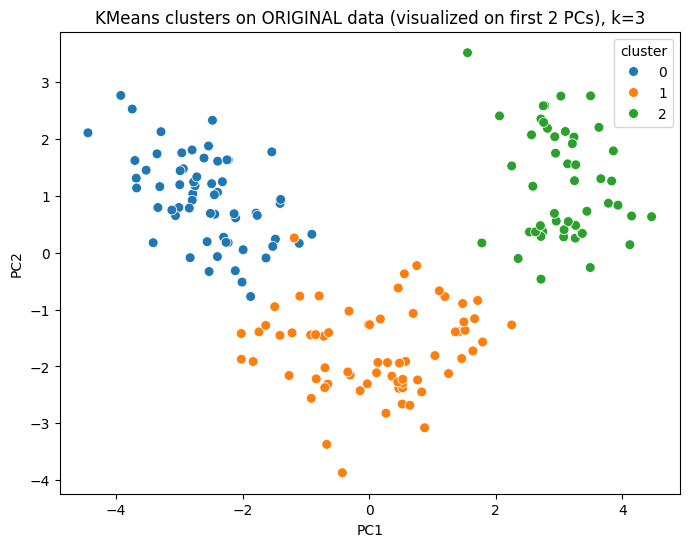

In [19]:
# If not already computed, compute 2-PC projection for plotting
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=labels_orig, palette='tab10', s=50)
plt.title(f'KMeans clusters on ORIGINAL data (visualized on first 2 PCs), k={k_chosen}')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='cluster')
plt.show()


# **4) Clustering on PCA-transformed data**

**Determine k (repeat silhouette/inertia)**

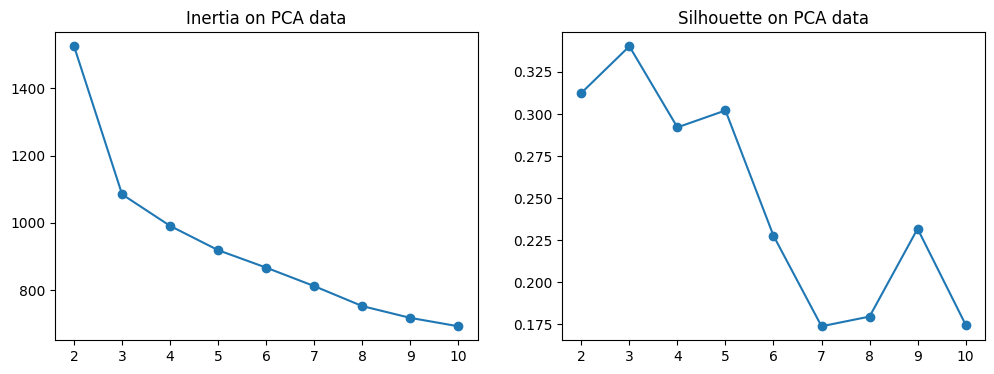

In [20]:
inertias_pca, silhouettes_pca = evaluate_kmeans(X_pca, (2,11))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(range(2,11), inertias_pca, marker='o')
plt.title('Inertia on PCA data')

plt.subplot(1,2,2)
plt.plot(range(2,11), silhouettes_pca, marker='o')
plt.title('Silhouette on PCA data')
plt.show()


**Train with chosen k (use same k_chosen or select new):**

In [21]:
k_chosen_pca = k_chosen  # or pick a different k based on plots
km_pca = KMeans(n_clusters=k_chosen_pca, random_state=42, n_init=20)
labels_pca = km_pca.fit_predict(X_pca)

print("Silhouette (PCA):", silhouette_score(X_pca, labels_pca))
print("Davies-Bouldin (PCA):", davies_bouldin_score(X_pca, labels_pca))


Silhouette (PCA): 0.3402428666857789
Davies-Bouldin (PCA): 1.1903042789637739


**Visualize PCA clusters (first two PCs)**

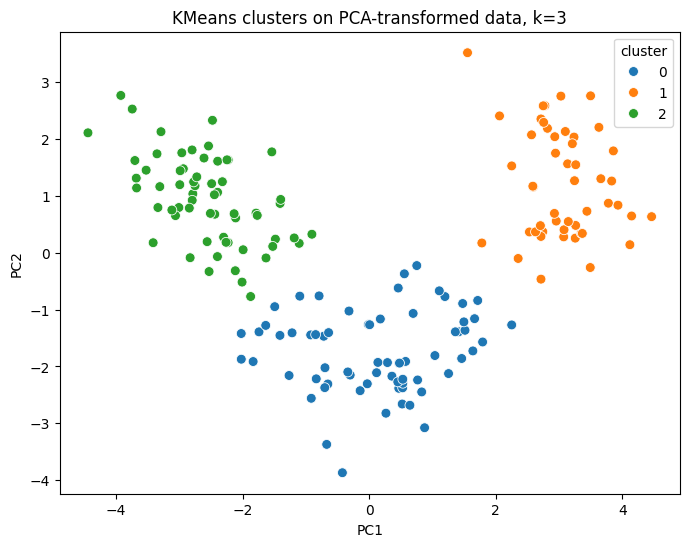

In [22]:
# If X_pca has >=2 components, plot PC1 vs PC2
if X_pca.shape[1] >= 2:
    plt.figure(figsize=(8,6))
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels_pca, palette='tab10', s=50)
    plt.title(f'KMeans clusters on PCA-transformed data, k={k_chosen_pca}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend(title='cluster')
    plt.show()
else:
    print("PCA reduced to 1 component — consider plotting along PC1 or re-run with n_components>=2.")


# **5) Compare clustering results (orig vs PCA)**

In [23]:
# Metrics summary
metrics_summary = pd.DataFrame({
    'Method': ['Original(Standardized)', 'PCA(k={})'.format(X_pca.shape[1])],
    'Silhouette': [silhouette_score(X_scaled, labels_orig), silhouette_score(X_pca, labels_pca)],
    'DaviesBouldin': [davies_bouldin_score(X_scaled, labels_orig), davies_bouldin_score(X_pca, labels_pca)]
})
display(metrics_summary)

# Optional: compare cluster assignment similarity (Adjusted Rand Index)
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(labels_orig, labels_pca)
print("Adjusted Rand Index between original-clusters and PCA-clusters:", ari)


,Method,Silhouette,DaviesBouldin
0,Original(Standardized),0.307736,1.316396
1,PCA(k=8),0.340243,1.190304


Adjusted Rand Index between original-clusters and PCA-clusters: 0.9817695505717349


**Interpretation tips**



*   Higher silhouette → better separated clusters (range -1..1).

*   Lower Davies–Bouldin → better clustering (lower is better).
*  ARI close to 1 → clusters agree; near 0 → random/independent.






# **6) Analysis & trade-offs (what to look for)**




*  Similar results: If clustering metrics are similar and ARI is high, PCA retained cluster structure well — dimensionality reduction was helpful (faster, less noise).

*   Differences: If PCA clustering metrics are worse or ARI low, PCA may have removed discriminative features for clustering (especially if low-variance features were important).

*  **When PCA helps:**


*  High-dimensional datasets (many collinear features).


*   Noise or redundant features that mask cluster structure.
*  Need for visualization or speed.



*  **When not to use PCA: **

*   When interpretability of original features matters (PCA components are linear combinations and harder to interpret).


*  When important cluster-separating signal lies in low-variance components (rare, but possible).

*   **Hyperparameter notes:**



*   KMeans sensitive to initialization and scale — always standardize and use n_init>=10.

*  Consider repeated runs and average metrics.


*  Try alternative clustering (GaussianMixture, Agglomerative, DBSCAN) if structure not spherical.













# **7) Conclusion & insights (template)**

**Key findings:**



*   Number of PCs needed to explain X% variance: k = {k}.

*   Clustering on standardized original data produced silhouette = …, Davies–Bouldin = ….

*   Clustering on PCA-transformed data (k={k}) produced silhouette = …, Davies–Bouldin = ….


*  ARI between assignments = … (similarity measure).

**Practical implications**:



*   If PCA clustering performed similarly or better → use PCA to reduce compute & remove noise; good for visualization and pipelines.

*   If PCA clustering performed worse → avoid aggressive dimensionality reduction; instead perform careful feature selection or try non-linear DR (t-SNE/UMAP) for visualization while clustering on original features.



*  Recommendations:

*   For high-dimensional numeric datasets: standardize → try PCA to 80–95% variance retained → cluster on PCA components and compare with clustering on original.

*   If interpretability needed, cluster on selected original features (or use techniques to map clusters back to original features).










# **8) Extras / extensions (optional)**



*   Use Pipeline([('scaler', StandardScaler()), ('pca', PCA(n_components=k)), ('km', KMeans(...))]) for tidy experiments.

*   Try GaussianMixture (soft clusters) and compare BIC/AIC.


*  Visualize cluster centers (transform centers back to feature space if needed): use pca.inverse_transform(...) to map PCA centers to original standardized space and then inverse-scale to original units for interpretation.







In [24]:
# Example: interpret PCA cluster centers in original feature space
centers_pca_in_scaled_space = pca.inverse_transform(km_pca.cluster_centers_)
centers_original_space = scaler.inverse_transform(centers_pca_in_scaled_space)
centers_df = pd.DataFrame(centers_original_space, columns=num.columns)
display(centers_df)


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,2.000269,12.245791,1.909666,2.225420,19.956875,92.527956,2.224188,2.018028,0.361035,1.602716,3.016034,1.053017,2.784538,518.851916
1,2.911761,13.154923,3.328411,2.428226,21.549796,99.141277,1.648886,0.818878,0.452797,1.164814,7.350252,0.676286,1.682486,622.886013
2,1.101705,13.694367,2.013391,2.470223,17.371764,108.011361,2.882484,2.998018,0.290865,1.914873,5.453281,1.076384,3.159260,1091.330758
